In [24]:
import pandas as pd
import matplotlib.pyplot as plt 

In [25]:
data_optimism = pd.read_csv("../Data_Source/optimism_delegate.csv", encoding='latin1')
data_compound = pd.read_csv("../Data_Source/compound_delegate.csv", encoding='latin1')
data_aave = pd.read_csv("../Data_Source/aave_delegate.csv", encoding='latin1')
data_uniswap = pd.read_csv("../Data_Source/uniswap_delegate.csv", encoding='latin1')

In [26]:
print(data_optimism.shape)
print(data_compound.shape)
print(data_aave.shape)
print(data_uniswap.shape)

(226569, 2)
(11220, 2)
(150840, 2)
(45140, 2)


In [27]:
# # Convert the voting_power column to numeric type
# data_compound['voting_power'] = pd.to_numeric(data_compound['voting_power'], errors='coerce')
# data_aave['voting_power'] = pd.to_numeric(data_aave['voting_power'], errors='coerce')
# data_uniswap['voting_power'] = pd.to_nuAmeric(data_uniswap['voting_power'], errors='coerce')

# # Divide the voting_power by 10^18
# data_compound['voting_power'] = data_compound['voting_power'] / pow(10, 18)
# data_aave['voting_power'] = data_aave['voting_power'] / pow(10, 18)
# data_uniswap['voting_power'] = data_uniswap['voting_power'] / pow(10, 18)

In [28]:
# data_compound.to_csv(r"F:\Measuring COP\Final Data\compound_delegate.csv")
# data_aave.to_csv(r"F:\Measuring COP\Final Data\aave_delegate.csv")
# data_uniswap.to_csv(r"F:\Measuring COP\Final Data\uniswap_delegate.csv")

In [29]:
df_optimism = data_optimism[data_optimism['voting_power'] > 1]
df_compound = data_compound[data_compound['voting_power'] > 1]
df_aave = data_aave[data_aave['voting_power'] > 1]
df_uniswap= data_uniswap[data_uniswap['voting_power'] > 1]

In [30]:
sum_voting_power_op = df_optimism['voting_power'].sum()
print("Total voting power of Optimism delegates:", round(sum_voting_power_op, 3))
sum_voting_power_comp = df_compound['voting_power'].sum()
print("Total voting power of Compound delegates:", round(sum_voting_power_comp, 2))
sum_voting_power_aave = df_aave['voting_power'].sum()
print("Total voting power of AAVE delegates:", round(sum_voting_power_aave, 2))
sum_voting_power_uni = df_uniswap['voting_power'].sum()
print("Total voting power of Uniswap delegates:", round(sum_voting_power_uni, 2))

Total voting power of Optimism delegates: 94107352.356
Total voting power of Compound delegates: 2074350.83
Total voting power of AAVE delegates: 13201493.42
Total voting power of Uniswap delegates: 200540823.71


In [31]:
# Calculate the share of each delegate and its square
df_optimism['share'] = ((df_optimism['voting_power'] * 100) / sum_voting_power_op)
df_optimism['share_squared'] = df_optimism['share'] ** 2
HHI_OP = df_optimism['share_squared'].sum()
print("HHI of Optimism:", round(HHI_OP, 6))

# Calculate the share of each delegate and its square
df_compound['share'] = ((df_compound['voting_power'] * 100) / sum_voting_power_comp)
df_compound['share_squared'] = df_compound['share'] ** 2
HHI_COMP = df_compound['share_squared'].sum()
print("HHI of Compound", round(HHI_COMP, 6))

# Calculate the share of each delegate and its square
df_aave['share'] = ((df_aave['voting_power']) * 100 / sum_voting_power_aave)
df_aave['share_squared'] = df_aave['share'] ** 2
HHI_AAVE = df_aave['share_squared'].sum()
print("HHI of Aave", round(HHI_AAVE, 6))

# Calculate the share of each delegate and its square
df_uniswap['share'] = ((df_uniswap['voting_power'] * 100) / sum_voting_power_uni)
df_uniswap['share_squared'] = df_uniswap['share'] ** 2
HHI_UNI = df_uniswap['share_squared'].sum()
print("HHI of Uniswap", round(HHI_UNI, 6))

HHI of Optimism: 318.78376
HHI of Compound 233.849029
HHI of Aave 627.33339
HHI of Uniswap 222.797801


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5892\2331703373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimism['share'] = ((df_optimism['voting_power'] * 100) / sum_voting_power_op)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5892\2331703373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimism['share_squared'] = df_optimism['share'] ** 2
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5892\2331703373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

## HHI for DAOs

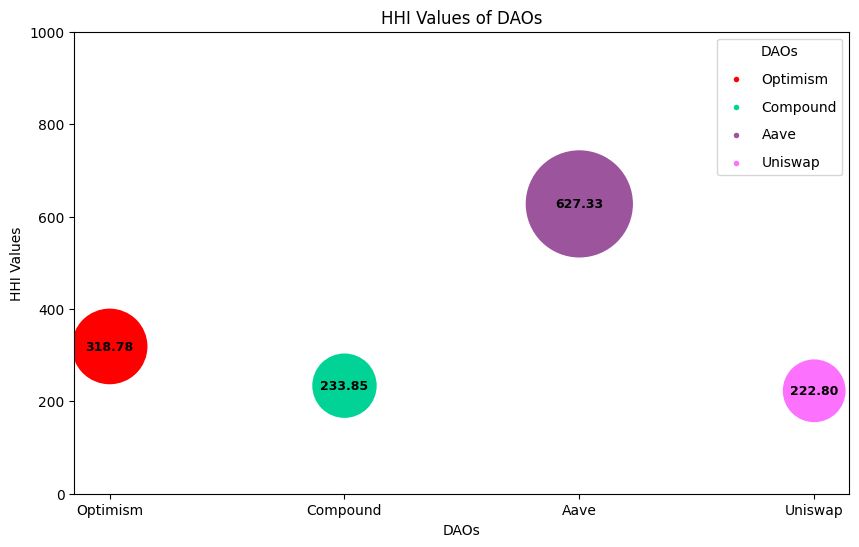

In [32]:
# Data
labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
hhi_values = [HHI_OP, HHI_COMP, HHI_AAVE, HHI_UNI]
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Bubble sizes (proportional to HHI values)
bubble_sizes = [value * 10 for value in hhi_values]  # Scaling up for better visibility

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(labels, hhi_values, s=bubble_sizes, c=colors, edgecolors="w", linewidth=2)

# Annotate each bubble with the HHI value
for i in range(len(labels)):
    plt.text(labels[i], hhi_values[i], f'{hhi_values[i]:.2f}', ha='center', va='center', fontsize=9, color='black', weight='bold')

# Labels and title
plt.xlabel('DAOs')
plt.ylabel('HHI Values')
plt.title('HHI Values of DAOs')

# Set y-axis range
plt.ylim(0, 1000)

# Add legend
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, edgecolor='w', linewidth=2, label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="DAOs")

# Display the chart
plt.show()

### CPI for DAOs

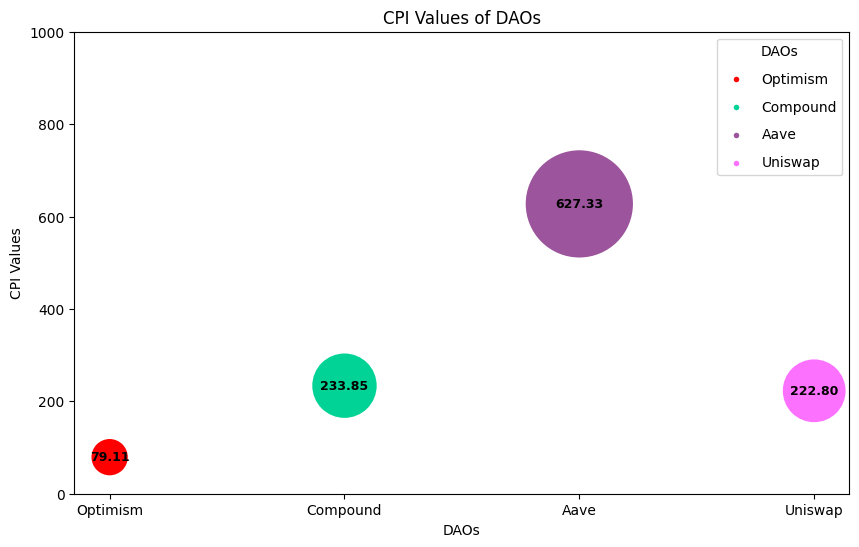

In [33]:
# Data
labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
hhi_values = [79.11, HHI_COMP, HHI_AAVE, HHI_UNI]
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Bubble sizes (proportional to HHI values)
bubble_sizes = [value * 10 for value in hhi_values]  # Scaling up for better visibility

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(labels, hhi_values, s=bubble_sizes, c=colors, edgecolors="w", linewidth=2)

# Annotate each bubble with the HHI value
for i in range(len(labels)):
    plt.text(labels[i], hhi_values[i], f'{hhi_values[i]:.2f}', ha='center', va='center', fontsize=9, color='black', weight='bold')

# Labels and title
plt.xlabel('DAOs')
plt.ylabel('CPI Values')
plt.title('CPI Values of DAOs')

# Set y-axis range
plt.ylim(0, 1000)

# Add legend
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, edgecolor='w', linewidth=2, label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="DAOs")

# Display the chart
plt.show()

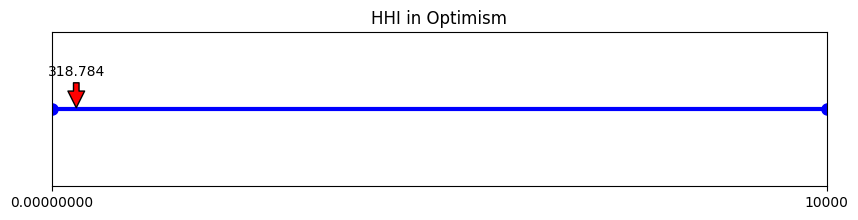

In [34]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_OP, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Optimism')

# Show the plot
plt.show()

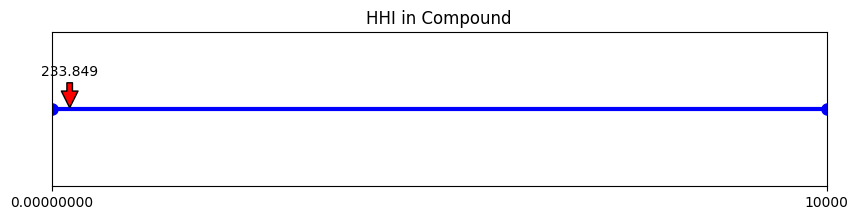

In [35]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_COMP, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Compound')

# Show the plot
plt.show()

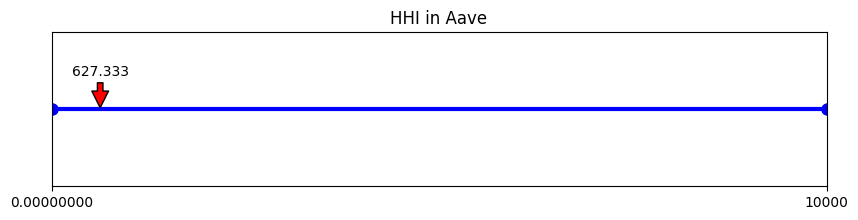

In [36]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_AAVE, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Aave')

# Show the plot
plt.show()

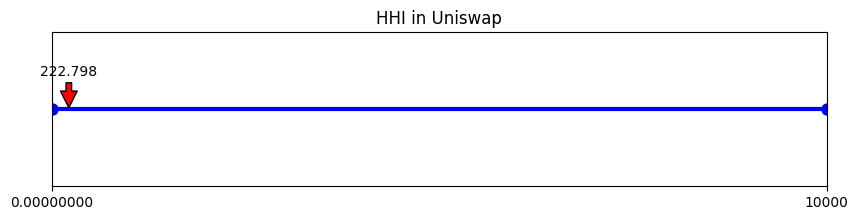

In [37]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_UNI, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Uniswap')

# Show the plot
plt.show()

### Updated Data as on 27-08-2024

In [38]:
optimism_data = pd.read_csv("../Data_Source/optimism_delegates_data.csv", encoding='latin1')
compound_data = pd.read_csv("../Data_Source/compound_delegates_data.csv", encoding='latin1')
aave_data = pd.read_csv("../Data_Source/aave_delegates_data.csv", encoding='latin1')
uniswap_data = pd.read_csv("../Data_Source/uniswap_delegates_data.csv", encoding='latin1')

In [39]:
print(optimism_data.shape)
print(compound_data.shape)
print(aave_data.shape)
print(uniswap_data.shape)

(228141, 2)
(11440, 2)
(150840, 2)
(45481, 2)


In [40]:
# # Convert the voting_power column to numeric type
# compound_data['voting_power'] = pd.to_numeric(compound_data['voting_power'], errors='coerce')
# aave_data['voting_power'] = pd.to_numeric(aave_data['voting_power'], errors='coerce')
# uniswap_data['voting_power'] = pd.to_numeric(uniswap_data['voting_power'], errors='coerce')

# # Divide the voting_power by 10^18
# compound_data['voting_power'] = compound_data['voting_power'] / pow(10, 18)
# aave_data['voting_power'] = aave_data['voting_power'] / pow(10, 18)
# uniswap_data['voting_power'] = uniswap_data['voting_power'] / pow(10, 18)

In [41]:
# compound_data.to_csv("../Data_Source/compound_delegates_data.csv", index=False)
# aave_data.to_csv("../Data_Source/aave_delegates_data.csv", index=False)
# uniswap_data.to_csv("../Data_Source/uniswap_delegates_data.csv", index=False)

In [42]:
df_optimism = optimism_data[optimism_data['voting_power'] > 1]
df_compound = compound_data[compound_data['voting_power'] > 1]
df_aave = aave_data[aave_data['voting_power'] > 1]
df_uniswap= uniswap_data[uniswap_data['voting_power'] > 1]

In [43]:
sum_voting_power_op = df_optimism['voting_power'].sum()
print("Total voting power of Optimism delegates:", round(sum_voting_power_op, 3))
sum_voting_power_comp = df_compound['voting_power'].sum()
print("Total voting power of Compound delegates:", round(sum_voting_power_comp, 2))
sum_voting_power_aave = df_aave['voting_power'].sum()
print("Total voting power of AAVE delegates:", round(sum_voting_power_aave, 2))
sum_voting_power_uni = df_uniswap['voting_power'].sum()
print("Total voting power of Uniswap delegates:", round(sum_voting_power_uni, 2))

Total voting power of Optimism delegates: 92135765.245
Total voting power of Compound delegates: 1982448.89
Total voting power of AAVE delegates: 13201444.36
Total voting power of Uniswap delegates: 204844519.7


In [44]:
# Calculate the share of each delegate and its square
df_optimism['share'] = ((df_optimism['voting_power'] * 100) / sum_voting_power_op)
df_optimism['share_squared'] = df_optimism['share'] ** 2
HHI_OP = df_optimism['share_squared'].sum()
print("HHI of Optimism:", round(HHI_OP, 6))

# Calculate the share of each delegate and its square
df_compound['share'] = ((df_compound['voting_power'] * 100) / sum_voting_power_comp)
df_compound['share_squared'] = df_compound['share'] ** 2
HHI_COMP = df_compound['share_squared'].sum()
print("HHI of Compound", round(HHI_COMP, 6))

# Calculate the share of each delegate and its square
df_aave['share'] = ((df_aave['voting_power']) * 100 / sum_voting_power_aave)
df_aave['share_squared'] = df_aave['share'] ** 2
HHI_AAVE = df_aave['share_squared'].sum()
print("HHI of Aave", round(HHI_AAVE, 6))

# Calculate the share of each delegate and its square
df_uniswap['share'] = ((df_uniswap['voting_power'] * 100) / sum_voting_power_uni)
df_uniswap['share_squared'] = df_uniswap['share'] ** 2
HHI_UNI = df_uniswap['share_squared'].sum()
print("HHI of Uniswap", round(HHI_UNI, 6))

HHI of Optimism: 329.251677
HHI of Compound 320.723865
HHI of Aave 627.338053
HHI of Uniswap 215.291105


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5892\2331703373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimism['share'] = ((df_optimism['voting_power'] * 100) / sum_voting_power_op)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5892\2331703373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimism['share_squared'] = df_optimism['share'] ** 2
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5892\2331703373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

### HHI for DAOs

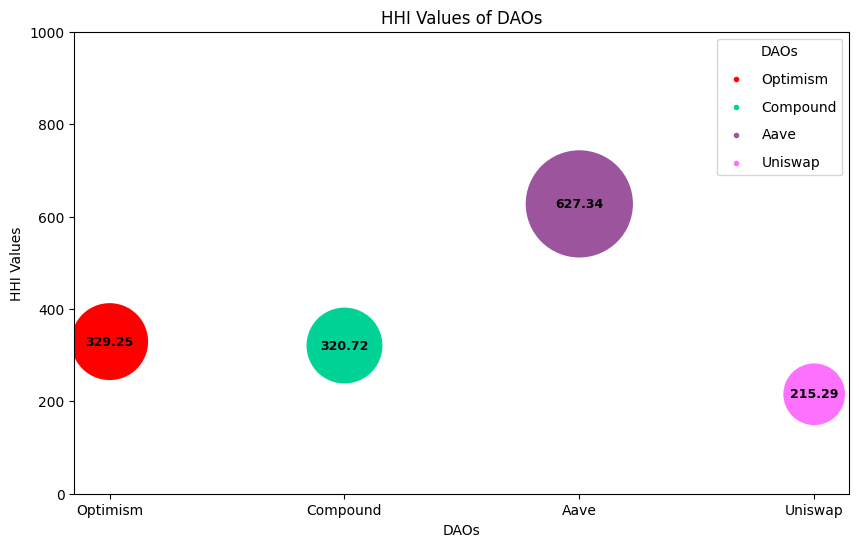

In [45]:
# Data
labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
hhi_values = [HHI_OP, HHI_COMP, HHI_AAVE, HHI_UNI]
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Bubble sizes (proportional to HHI values)
bubble_sizes = [value * 10 for value in hhi_values]  # Scaling up for better visibility

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(labels, hhi_values, s=bubble_sizes, c=colors, edgecolors="w", linewidth=2)

# Annotate each bubble with the HHI value
for i in range(len(labels)):
    plt.text(labels[i], hhi_values[i], f'{hhi_values[i]:.2f}', ha='center', va='center', fontsize=9, color='black', weight='bold')

# Labels and title
plt.xlabel('DAOs')
plt.ylabel('HHI Values')
plt.title('HHI Values of DAOs')

# Set y-axis range
plt.ylim(0, 1000)

# Add legend
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, edgecolor='w', linewidth=2, label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="DAOs")

# Display the chart
plt.show()

### CPI for DAOs

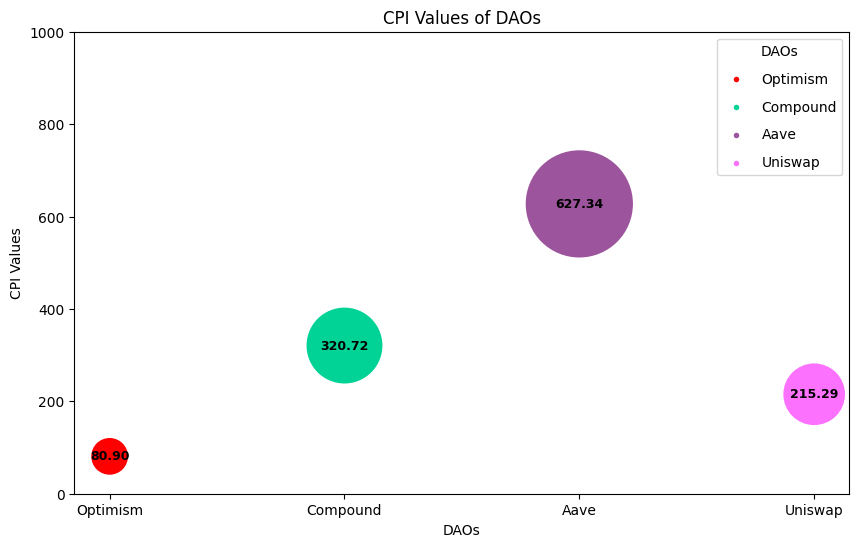

In [46]:
# Data
labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
hhi_values = [80.90, HHI_COMP, HHI_AAVE, HHI_UNI]
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Bubble sizes (proportional to HHI values)
bubble_sizes = [value * 10 for value in hhi_values]  # Scaling up for better visibility

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(labels, hhi_values, s=bubble_sizes, c=colors, edgecolors="w", linewidth=2)

# Annotate each bubble with the HHI value
for i in range(len(labels)):
    plt.text(labels[i], hhi_values[i], f'{hhi_values[i]:.2f}', ha='center', va='center', fontsize=9, color='black', weight='bold')

# Labels and title
plt.xlabel('DAOs')
plt.ylabel('CPI Values')
plt.title('CPI Values of DAOs')

# Set y-axis range
plt.ylim(0, 1000)

# Add legend
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, edgecolor='w', linewidth=2, label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="DAOs")

# Display the chart
plt.show()